# Titanic Survival Prediction using Logistic Regression

The aim is to make predictions on the survival outcome of passengers. Since this is a binary classification, logistic regression can be used to build the model.

Dataset source: (https://www.kaggle.com/c/titanic/data)
The dataset is already splitted into train and test set.

# Importing the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

# Reading the dataset

In [2]:
#Read CSV titanic data file into DataFrame
dataset = pd.read_csv("titanic.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dataset Column Description**

    PassenderId: PassengerId is the Id given to all the passengers to uniquely identify each individual.
    Survived: Survived indicates whether the passenger survived or not (0 for not survived and 1 for survived).
    Pclass: Passenger class indicates the class a passenger belongs (1 for 1st class, 2 for 2nd class, and 3 for 3rd class).
    Name: Name is the name of the passenger.
    Sex: Sex indicated the gender of the passenger.
    Age: Age indicates the age of the passenger.
    SibSp: SibSp indicated the number of siblings/spouses aboard.
    Parch: Parch indicates the number of parents/children aboard.
    Ticket: Ticket indicates the ticket number.
    Fare: Fare is the passenger fare in pound.
    Cabin: Cabin indicated the cabin number.
    Embarked: Embarked indicates port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# Data Pre-Processing

**Checking for missing values**

In [4]:
#Checking for missing values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Conclusion:** The columns Age, Cabin, and Embarked have missing values

**Imputation of missing values**

In [5]:
print('Median of Age column: %.2f' %(dataset["Age"].median(skipna=True)))
print('Percent of missing records in the Cabin column: %.2f%%' %((dataset['Cabin'].isnull().sum()/dataset.shape[0])*100))
print('Most common boarding port of embarkation: %s' %dataset['Embarked'].value_counts().idxmax())

Median of Age column: 28.00
Percent of missing records in the Cabin column: 77.10%
Most common boarding port of embarkation: S


We'll fill the missing values of the Age column by medin of the Age column.

We'll drop the Cabin column as it 77.10% of the records are missing.

We'll fill the missing values of the Embarked column by the most common port od embarkation.

In [6]:
dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(), inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)

In [7]:
#Checking missing values after imputation of missing values
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Dropping unnecessary columns**

In [8]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket',  axis=1, inplace=True)

**Creating categorical variable for traveling alone**

In [9]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0, 1)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)

**Conclusion:** Both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I combined the effect of these variables into one categorical predictor: whether or not that individual was traveling alone

In [10]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


# Exploratory Data Analysis

**Dataset shape**

In [11]:
#Number of rows and columns of train set
dataset.shape

(891, 7)

**Conclusion:** The dataset has 891 rows and 7 columns

**Dataset info**

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   TravelAlone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 45.4+ KB


**Dataset description**

In [13]:
dataset.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


**1. Analysis of Sex feature**

**Count of passengers based on gender**

male      577
female    314
Name: Sex, dtype: int64

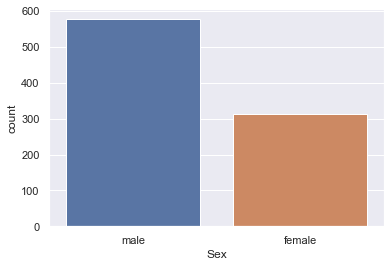

In [17]:
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

**Conclusion:** There are 577 male bassengers and 314 female passengers. Therefore the number of males on board are more than the female.

**Effect of Sex feature on the survival rate**

,Sex,Survived
0,female,0.742038
1,male,0.188908


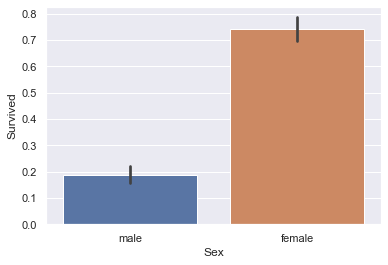

In [18]:
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean()

**Conclusion:** The number of female who survived was much more than the males who survived. 74% of the females survived and on the other hand only 18% of the males survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

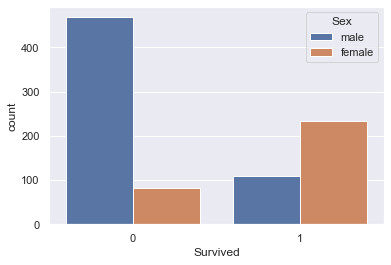

In [19]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

**Conclusion:** It is clear from the above graph that among the passengers who did not survive, most of them were males. And among the passengers who survived, most of them were females.

**2. Analysis of Pclass feature**

Pclass (Passenger class) indicates the class a passenger belongs, 1 for 1st class, 2 for 2nd class, and 3 for 3rd class

**Count of passengers based on Pclass**

3    491
1    216
2    184
Name: Pclass, dtype: int64

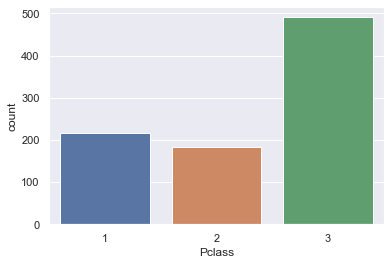

In [20]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

**Conclusion:** Number of passengers belonging to 3rd class is 491 which is maximum, number of people belonging to 1st class is 216 which is second highest, and the number of people belonging to 2nd class is 184 which is the minimum. 

**Effect of Pclass feature on the survival rate**

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


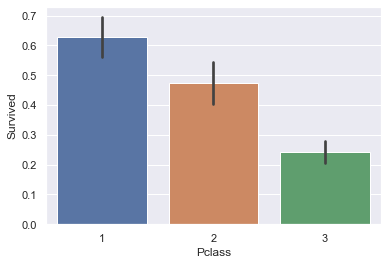

In [21]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

**Conclusion:** The survival rate of the passengers belonging to 1st class is more i.e. 62.96% and the survival rate of the passengers belonging to 3rd class is least i.e. 24.23%. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

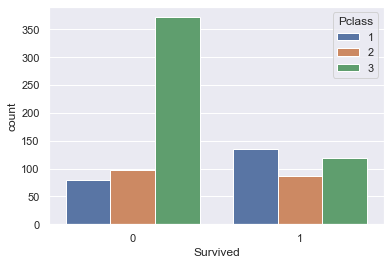

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

**Conclusion:** It is clear from the above graph that among the passengers who did not survive, most of them belong to 3rd class. And among the passengers who survived, most of them belong to 1st class.

**3. Analysis of Age feature**

**Passengers more likely to survive based on Age**

The Median age of passengers is : 28


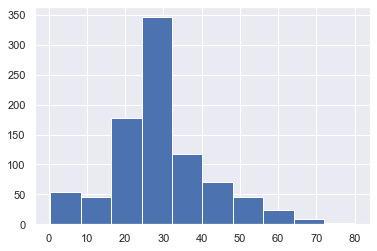

In [23]:
dataset.Age.hist()
print("The Median age of passengers is :", int(dataset.Age.median()))

**Conclusion:** It is clear from the above graph that the younger passengers were more likely to survive. The median age of the passengers survived is 28.

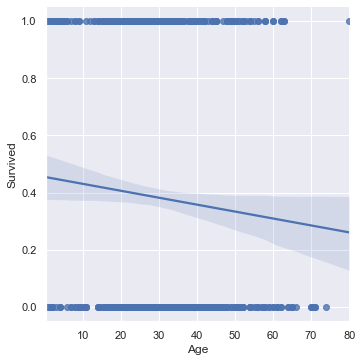

In [24]:
sns.lmplot(x='Age',y='Survived',data=dataset)

**Conclusion:** It is clear from the above graph that younger individuals were more likely to survive. As we can see that the regression line shows negative correlation. Therefore increase in age leads to lesser chance of survival.

**4. Analysis of Embarked feature**

Embarked indicates port of embarkation (0 = Cherbourg, 1 = Queenstown, 2 = Southampton).

**Count of the passengers basen on Emabarked**

S    646
C    168
Q     77
Name: Embarked, dtype: int64

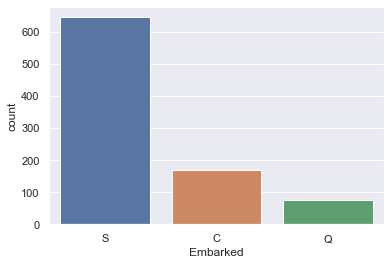

In [25]:
sns.countplot('Embarked',data=dataset)
dataset['Embarked'].value_counts()

**Conclusion:** Number of passengers traveling from Southampton port is 646 which is the maximum, number of passengers traveling from Cherbourg port is 168, and the number of people traveling from Queenstown is 77 which is the minimum.

**Effect of Embarked feature on survival rate**

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


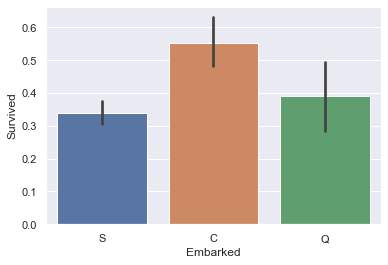

In [26]:
sns.barplot(x='Embarked',y='Survived',data=dataset)
dataset.groupby('Embarked',as_index=False).Survived.mean()

**Conclusion:** passengers that embarked from port Cherbourg had a higher rate of Survival at 55.35%.

<AxesSubplot:xlabel='Survived', ylabel='count'>

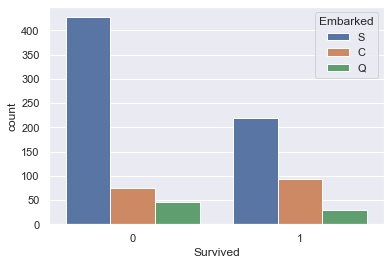

In [27]:
sns.countplot(x='Survived', hue='Embarked', data=dataset)

**Conclusion:** It is clear from the above graph that among the passengers who did not survive, most of them embarked from Southampton. And among the passengers who survived, most of them embarked from Southampton.

**5. Analysis of TravelAlone feature**

**Count of passengers based on TravelAlone**

1    537
0    354
Name: TravelAlone, dtype: int64

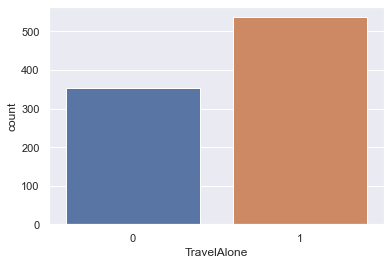

In [28]:
sns.countplot('TravelAlone',data=dataset)
dataset['TravelAlone'].value_counts()

**Conclusion:** 354 passengers were traveling alone and 537 passengers were not traveling alone.

**Effect of TravelAlone on the survival rate**

,TravelAlone,Survived
0,0,0.505650
1,1,0.303538


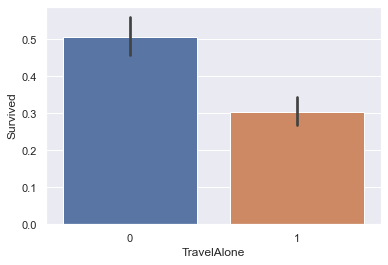

In [29]:
sns.barplot(x='TravelAlone',y='Survived',data=dataset)
dataset.groupby('TravelAlone',as_index=False).Survived.mean()

**Conclusion:** Passengers travelling alone were more likely to survive.

**Analysis of Survived feature**

0    549
1    342
Name: Survived, dtype: int64

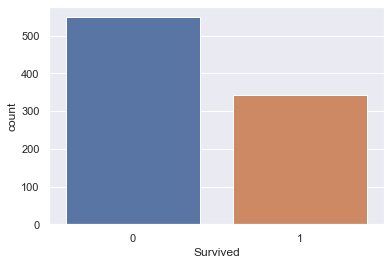

In [30]:
sns.countplot('Survived',data=dataset)
dataset['Survived'].value_counts()

**Conclusion:** For the given dataset 549 passengers did not survive and 342 passengers survived.

**Correlation Matrix**

In [31]:
#Correleation matrix
dataset.corr()

,Survived,Pclass,Age,Fare,TravelAlone
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.203367
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.135207
Age,-0.064910,-0.339898,1.000000,0.096688,0.171647
Fare,0.257307,-0.549500,0.096688,1.000000,-0.271832
TravelAlone,-0.203367,0.135207,0.171647,-0.271832,1.000000


# Model Building

**Label encoding for categorical variables**

In [32]:
#Import label encoder
from sklearn import preprocessing
  
#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column Sex and Embarked
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Embarked']= label_encoder.fit_transform(dataset['Embarked'])

In [33]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


In [34]:
#Setting the value for dependent and independent variables
X = dataset.drop('Survived', 1)
y = dataset.Survived

In [35]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [36]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

# Model Evaluation

In [38]:
#Accuracy of the LOgistic Regression model
from sklearn.metrics import accuracy_score
print('Accuracy of the model: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

Accuracy of the model: 78.73


In [39]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
a.head()

,Actual value,Predicted value
707,1,0
37,0,0
615,1,1
169,0,0
68,1,1


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       160
           1       0.77      0.67      0.72       108

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



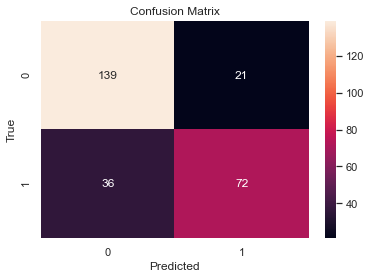

In [40]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, y_pred))